<a href="https://colab.research.google.com/github/JonaSiraQ/ToolBox-Python-DataScience/blob/main/Toolbox_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>[ToolBox SQL](#scrollTo=AHONY2VzigaP)

>[SQL - Conceptos generales](#scrollTo=WHr-oSwd0MGm)

>>[OPERADORES](#scrollTo=DRCnJwEwMWdN)

>[DML (Data Manipulation Language)](#scrollTo=dniioirOynrZ)

>>[Consultas SELECT](#scrollTo=tGPQ5iU6iyb6)

>>>[Function de conexion y consulta](#scrollTo=LbYPFlPi0cVv)

>>>[Consulta Schema](#scrollTo=HO8nv9bR1Uue)

>>>[SELECT: proyectar datos](#scrollTo=zZPXSK2L9PJX)

>>>[WHERE: filtrar datos](#scrollTo=bxnpfN0H-z60)

>>>[ORDER BY: ordenando datos](#scrollTo=ZF9RbmciAv6Q)

>>>[DISTINCT: no mostrar duplicados](#scrollTo=QgDE4RLdDC4H)

>>>[GROUP BY y COUNT: agrupando y sumarizando](#scrollTo=3xyAom-9DuwX)

>>>[HAVING: filtrando luego de agrupar.](#scrollTo=EdYI0aa6HyzC)

>>>[UNION y UNION ALL: combinando consultas CON o SIN duplicados.](#scrollTo=HpHURmbLKG5Z)

>>>[INTERSECT: combina consultas mostrando solo los resultados que COINCIDEN en ambos Select.](#scrollTo=PMH5WRi5K-m9)

>>>[EXCEPT: sustraccion de resultados.](#scrollTo=UKckrW3sLk-h)

>>[Consultas JOIN](#scrollTo=dNH4fGrNNXLG)

>>>[JOIN o INNER JOIN](#scrollTo=MOCkH1DJYYut)

>>>[OUTER JOINS](#scrollTo=hiD2IpqKSkwq)

>>>[Vistas de tablas en Parquet](#scrollTo=WMhpvSrSjRs8)

>>[Funciones utiles](#scrollTo=FQZaWr7CmMq7)



# ToolBox SQL




# SQL - Conceptos generales

Las bases de datos SQL generalmente operan con el modelo cliente-servidor. 
Se cuenta con un servidor de BD donde se accede a la información y se ejecutan las instrucciones, y el/los cliente/s se conectan mediante una interfaz a través de la cual le envían peticiones y reciben las respuestas.


SQLite es Open Source y se ha instalado por defecto con Python, es decir forma parte de la biblioteca estándar, no tenemos que instalar ningún módulo con pip. 

Al utilizar SQLite no hay necesidad de tener un servidor externo corriendo, lo que simplifica la implementación de los ejemplos que aquí veremos, ya que en caso contrario, deberíamos primero instalar un servidor de base de datos en nuestra computadora, crear las tablas allí y luego conectarnos usando un **conector** (todas las bases de datos proveen los conectores para todos los lenguajes de programación que soportan), por ejemplo si estamos programando en python y queremos conectarnos a una base de datos MySql, debemos descargar primero el conector que a día de hoy (9/6/22) está en la versión "Connector/Python 8.0.29": https://dev.mysql.com/downloads/connector/python/


## OPERADORES

Se utilizan en las intrucciones WHERE y HAVING.




Hay variados operadores que se pueden utilizar.


***De comparacion:***
* =, <, >, >=, <=, <>

***Matematicos:***
* (), *, /, +, -

***Logicos:***
* BETWEEN a AND b        -- Rango de numeros, texto o fechas.
* [NOT] IN (a, b, c)     -- Chequea si los valores estan contenidos en la consulta.
* IS [NOT] NULL          -- Chequea si el valor es NULL (es igual a vacio, es distinto de un espacio).
* [NOT] LIKE             -- Compara vs un texto.
* [NOT] EXISTS           -- Chequea la existencia de valores.


# DML (Data Manipulation Language)

Este lenguaje permite realizar diferentes acciones a los datos que se encuentran en una base de datos.
Permite recuperar, almacenar, modificar, eliminar, insertar y actualizar datos de una base de datos. Es lo que más a menudo vamos a estar utilizando.

Operaciones soportadas por DML:
- SELECT: Utilizado para consultar registros de la base de datos que satisfagan un criterio determinado.
- INSERT: Utilizado para cargar de datos en la base de datos en una única operación.
- UPDATE: Utilizado para modificar los valores de los campos y registros especificados
- DELETE: Utilizado para eliminar registros de una tabla de una base de datos.

## Consultas SELECT


La instrucción SELECT se utiliza para seleccionar datos de una base de datos.

Los datos devueltos se almacenan en una tabla de resultados.

Cómo se puede entonces refinar la selección de datos, con las siguientes instrucciones. Y atención porque deben respetar el orden de ejecución con que las escribí:

- FROM        -- Specify the tables to be queried
- WHERE       -- Filter the returned rows
- GROUP BY    -- Aggregate rows
- HAVING      -- Filter the aggregates
- SELECT      -- Specify the columns to show
- ORDER BY    -- Order the returned rows
- LIMIT       -- Limit the returned rows

Sería erróneo por ejemplo intentar ejecutar "FROM Tabla SELECT ..." o "SELECT Where ... FROM Tabla".

Así mismo, algunos operadores van de la mano con otros, también sería erróneo ejecutar: "SELECT * FROM Tabla HAVING" .El HAVING requerirá primero haber hecho un agrupamiento.


### Function de conexion y consulta

Para hacer un poco más sencilla la codificación de ahora en adelante y no copiar todo el tiempo las mismas líneas de código, voy a definir una funcion que reciba una cadena de texto y se encarge de iniciar la conexión, hacer la query, cerrar la conexión y devolver el resultado.

In [ ]:
def select(query_a_ejecutar):
  connection=sqlite3.connect("Diplo_DB.db")
  cursor = connection.cursor()
  try: #Ya que está hago uso de try y catch para obtener una respuesta adecuada ante errores
    cursor.execute(query_a_ejecutar)
    result = cursor.fetchall()
  except sqlite3.OperationalError:
    print("Error al procesar la query")
    result = -1 #En caso de error devolverá el código de error -1
  finally:
    cursor.close()
    connection.close()
    return result

### Consulta Schema

Con esta consulta podemos ver una descripcion de las principales caracteristicas de las columnas de una tabla.

Puede diferir para distintos DBMS.

In [ ]:
query = """
SELECT column_name, data_type, character_maximum_length
FROM INFORMATION_SCHEMA.COLUMNS
WHERE table_name = 'alumnos';
"""

print(query)

SQLite:

In [ ]:
query = """
.schema 'alumnos'
"""

ORACLE:

In [ ]:
query = """
DESCRIBE 'alumnos'
"""

### SELECT: proyectar datos

In [ ]:
query = """
SELECT *
FROM nombre_tabla;
"""

In [ ]:
query = """
SELECT col_1, col_2
FROM nombre_tabla;
"""

### WHERE: filtrar datos

Aplica siempre a TODA la seleccion.

Filtro con una sola condicion:

In [ ]:
query = """
SELECT col_1, col_2
FROM nombre_tabla
WHERE standard = 'ANSI';
"""

# La condicion del WHERE puede devolver: True, False o Unknown.

Filtro con varias condiciones:

In [ ]:
query = """
SELECT col_1, col_2, col_3
FROM nombre_tabla
WHERE 
  year > 1970 AND
  standard IS NULL;
"""

# NULL es un VACIO. Un espacio No es NULL, ni vacio.

### ORDER BY: ordenando datos

Por default ordena de forma ASC.

In [ ]:
query = """
SELECT col_1, col_2, col_3
FROM nombre_tabla
WHERE 
  year > 1970 AND
  standard IS NULL
ORDER BY col_2;
"""

Hacemos referncia a la columna nro. 2 que mencionamos en la consulta, es decir, col_2.

In [ ]:
query = """
SELECT col_1, col_2, col_3
FROM nombre_tabla
WHERE 
  year > 1970 AND
  standard IS NULL
ORDER BY 2;
"""

Ordenamos de forma DESC.

In [ ]:
query = """
SELECT col_1, col_2, col_3
FROM nombre_tabla
WHERE 
  year > 1970 AND
  standard IS NULL
ORDER BY 
  col_2 DESC;
"""

Combinamos distintas columnas para ordenar.

In [ ]:
query = """
SELECT col_1, col_2, col_3
FROM nombre_tabla
WHERE 
  year > 1970 AND
  standard IS NULL
ORDER BY 
  col_2 DESC,
  col_3 ASC;
"""

### DISTINCT: no mostrar duplicados

In [ ]:
query = """
SELECT DISTINCT (col_1)
FROM nombre_tabla;
"""

### GROUP BY y COUNT: agrupando y sumarizando

Agrupamos en subsets que hacen match en 1 o mas columnas.

In [ ]:
query = """
SELECT 
  col_1, 
  COUNT(col_1)
FROM nombre_tabla
GROUP BY
  col_1;
"""

# Se va a estar sumarizando por la columna especificada en el GROUP BY (col_1).

Podemos asignar un alias.

In [ ]:
query = """
SELECT 
  col_1, 
  COUNT(col_1) AS suma
FROM nombre_tabla
GROUP BY
  col_1;
"""

Podemos mostrar otras columnas tambien.

In [ ]:
query = """
SELECT 
  col_1, 
  col_2,
  COUNT(*)
FROM nombre_tabla
GROUP BY
  col_1;
"""

# Se va a estar sumarizando por la columna especificada en el GROUP BY (col_1).

### HAVING: filtrando luego de agrupar.

Aplica SOLO despues del GROUP BY.

In [ ]:
query = """
SELECT 
  col_1, 
  COUNT(col_1) AS suma
FROM nombre_tabla
GROUP BY
  col_1
HAVING
  COUNT(col_1) > 4;
"""

# Se va a estar sumarizando por la columna especificada en el GROUP BY (col_1).

In [ ]:
query = """
SELECT 
  col_1, 
  col_2,
  col_3
FROM nombre_tabla
GROUP BY
  col_3,
  col_2,
  col_1
HAVING
  col_3 < 1980;
"""

### UNION y UNION ALL: combinando consultas CON o SIN duplicados.

Similar a la "union de conjuntos".

UNION: NO muestra los duplicados.

In [ ]:
query = """
SELECT 
  col_1, 
  col_2
FROM nombre_tabla_1

UNION

SELECT 
  col_1, 
  col_2
FROM nombre_tabla_2;
"""

UNION ALL: muestra los duplicados.

In [ ]:
query = """
SELECT 
  col_1, 
  col_2
FROM nombre_tabla_1

UNION ALL

SELECT 
  col_1, 
  col_2
FROM nombre_tabla_2;
"""

### INTERSECT: combina consultas mostrando solo los resultados que COINCIDEN en ambos Select.

Similar a la "interseccion de conjuntos".

In [ ]:
query = """
SELECT 
  col_1, 
  col_2
FROM nombre_tabla_1

INTERSECT

SELECT 
  col_1, 
  col_2
FROM nombre_tabla_2;
"""

### EXCEPT: sustraccion de resultados.

Sustrae los resultados del SEGUNDO SELECT a los del primer select, o viceversa.

In [ ]:
query = """
SELECT 
  col_1, 
  col_2
FROM nombre_tabla_1

EXCEPT

SELECT 
  col_1, 
  col_2
FROM nombre_tabla_2;
"""

## Consultas JOIN

Combinan filas de 2 o mas tablas. Se basan en la relacion entre cierts columnas de las tablas.

1) Identificar la relacion entre las tablas. Es decir, las columnas de cada una de las tablas que se van a usar para linkear las tablas.

2) Ver las PK y FK de las tablas que necesito.

### JOIN o INNER JOIN

Combina las filas de 2 o más tablas.

Muestra SOLO LOS MATCHES de la COLUMNA en común.

JOIN ON e INNER JOIN ON son equivalentes.

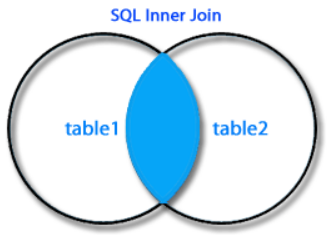

1) Crea una tabla con todas las columnas.

2) Trae solo las filas que cumplen la condición.

In [ ]:
query = """
SELECT
  a.col_1, 
  a.col_2,
  b.col_1,
  b.col_2
FROM 
  tabla_1 a  -- Alias de tabla_1
INNER JOIN 
  tabla_2 b  -- Alias de tabla_2
ON a.col_1 = b.col_2 
"""

# Muestra las filas de las columnas solicitadas DONDE los valores de a.col_1 = b.col_2 
# son iguales.

### OUTER JOINS



In [ ]:
connection.execute("""CREATE TABLE Facturas (
                            FacturaID INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
                            ClienteID INTEGER NOT NULL,
                            Fecha TEXT NOT NULL,
                            FOREIGN KEY (ClienteID) REFERENCES Clientes (ClienteID) 
                        )""")

query = "SHOW COLUMNS IN " + tabla
columnas = spark.sql(query)

### Vistas de tablas en Parquet


En este caso, la informacion esta guardada en tablas en formato Parquet.

Usamos Spark para crear una VISTA de cada tabla. 

Luego de crear las vistas, se pueden gestionar las tablas mediante lenguaje SQL (antes es imposible).

In [ ]:
# Creamos una lista GLOBAL donde guardamos el nombre de cada vista creada.
nombre_tablas_algo = []

In [ ]:
def crear_vista(ruta, nombre):
  """ 
      Esta Function recibe el path y el nombre para crear una vista de una tabla 
      almacenada en formato Parquet.

      Args:
        ruta (string): Es el path de la tabla.
        nombre (string): El nombre que le asignamos a la vista.

      Actions:
        Crea una vista llamada segun el arg 'nombre'.
        nombre_tablas_algo: Lista con nombres de las distintas vistas creadas
          durante la ejecucion.
  
      By @JonaSiracusaDev
  """

  tabla = ruta
  tabla = spark.read.format('parquet').load(tabla)
  tabla.createOrReplaceTempView(nombre)
  
  # Guardamos el nombre de la vista que creamos.
  nombre_tablas_algo.append(str(nombre))

Llamamos a la funcion y creamos la vista:

In [ ]:
ruta = '/mnt/consumezone/Bolivia/Commercial/Dimensiones/DimClientesHist'
nombre = 'historial'

crear_vista(ruta, nombre)

## Funciones utiles

Estas funciones son utiles a la hora de explorar y/o hacer chequeos de informacion dentro de las vistas ya creadas.

Funcion que devuelve una lista con los nombres de las columnas de una tabla (vista ya creada). Se llama a la tabla a traves del nombre que se le asigno cuando se creo la vista.

In [ ]:
def crear_lista_columnas(tabla):
  """ Esta funcion crea una lista con el nombre de las columnas de una vista ya 
      creada.
      
      Args:
        tabla: Nombre de la vista de la tabla de la que se quieren conocer las
          columnas.
      
      Returns:
        lista_columns (list): Retorna una lista de Py con los nombres de las 
          columnas.
      
      By @JonaSiracusaDev
  """
  
  lista_columnas = []

  query = "SHOW COLUMNS IN " + tabla
  columnas = spark.sql(query)

  nombres = columnas.rdd.map(lambda p: p.col_name).collect()
  for col_name in nombres:
      lista_columnas.append(col_name)
      
  return lista_columnas

In [ ]:
# Ingrese código aquí